# Loading data and libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plot

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

## Missing values detection


Before applying any models we must make sure that there are no missing values in our data.

In [27]:
california_housing.frame.isna().any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

There are no missing values in our dataset.

# Exploratory Data Analysis (EDA)

## This section shows the distribution of the features

## Joint Plots

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


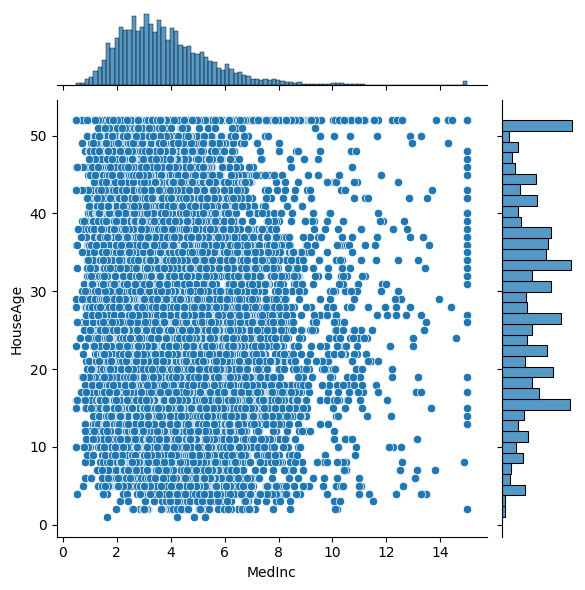

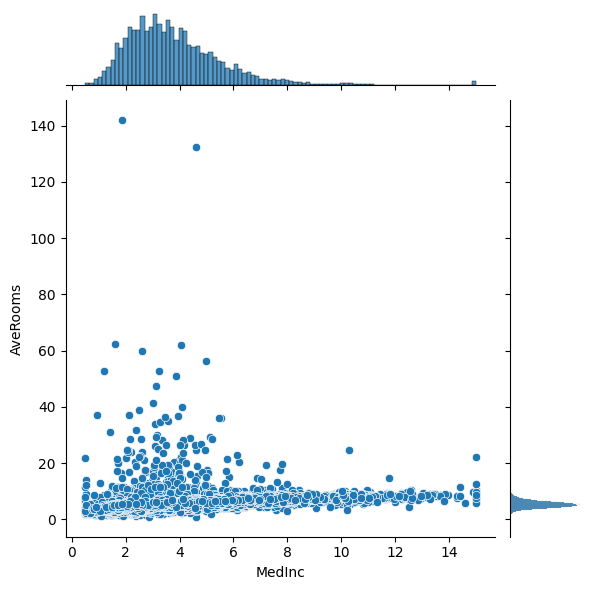

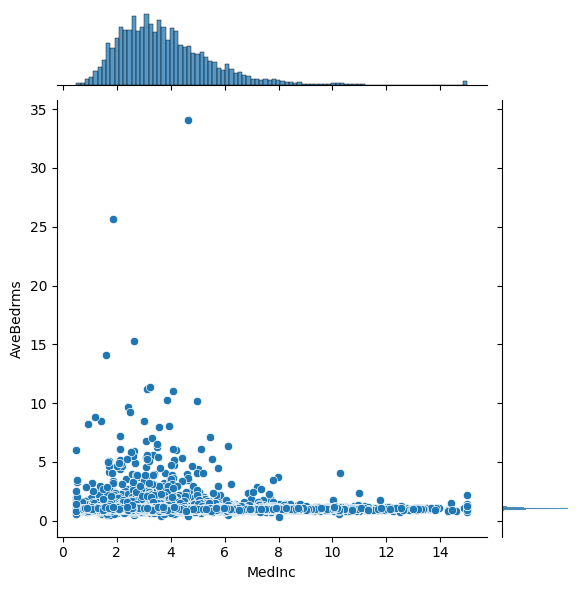

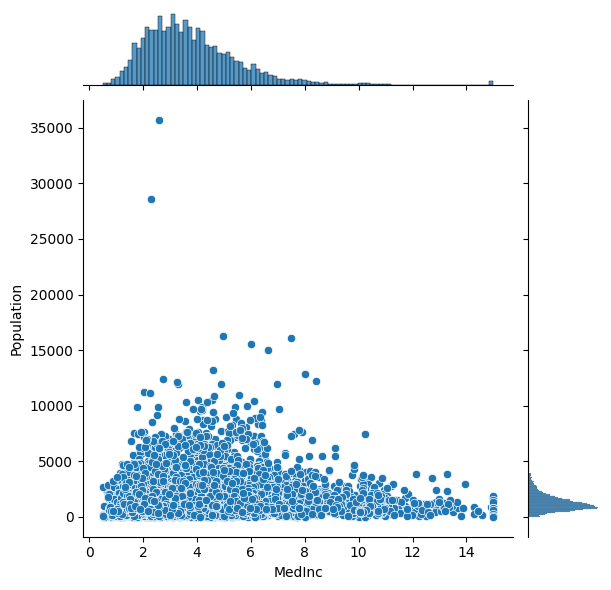

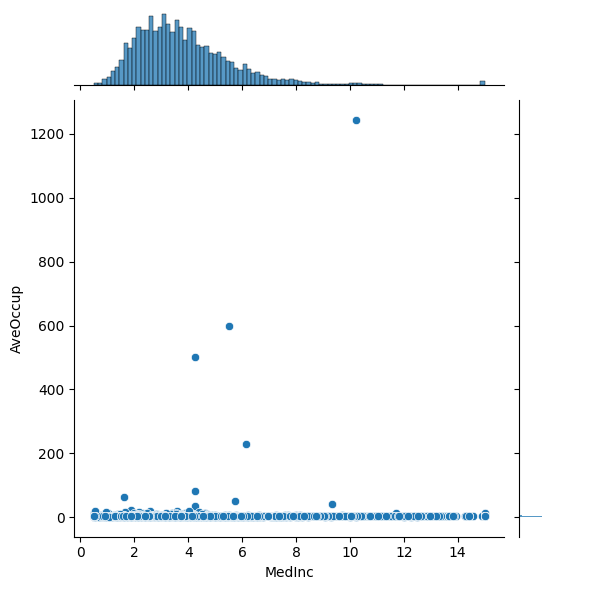

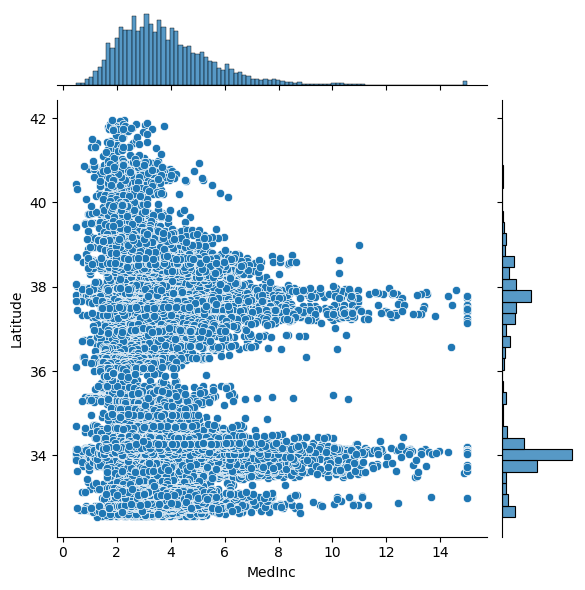

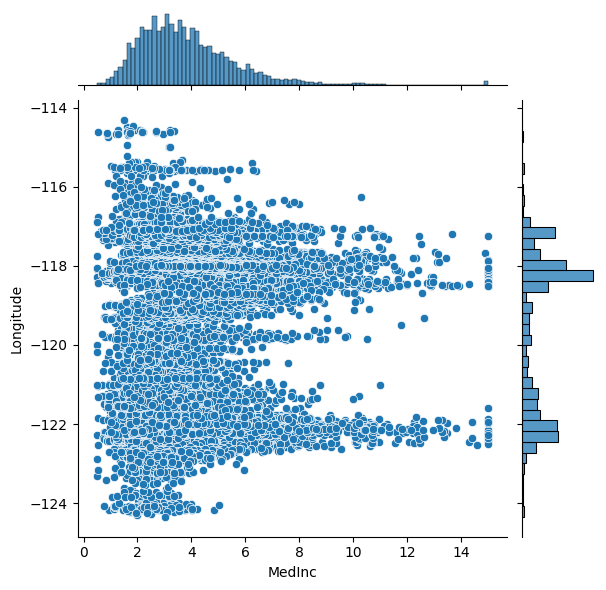

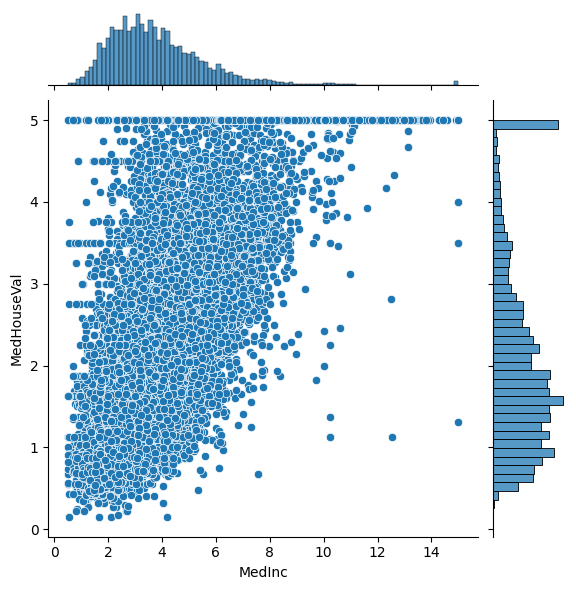

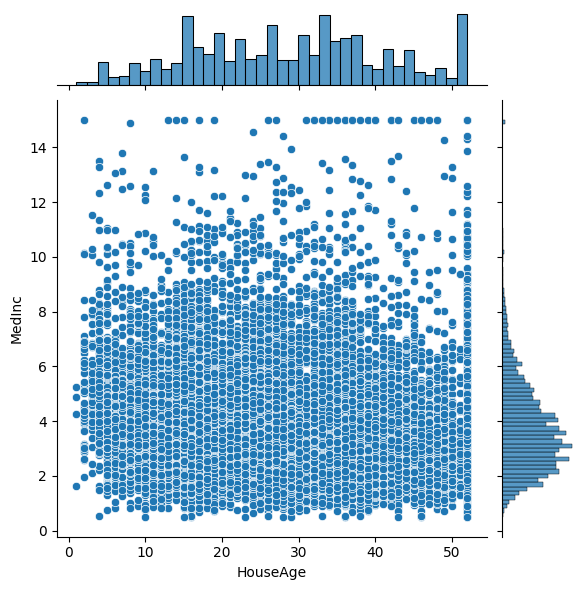

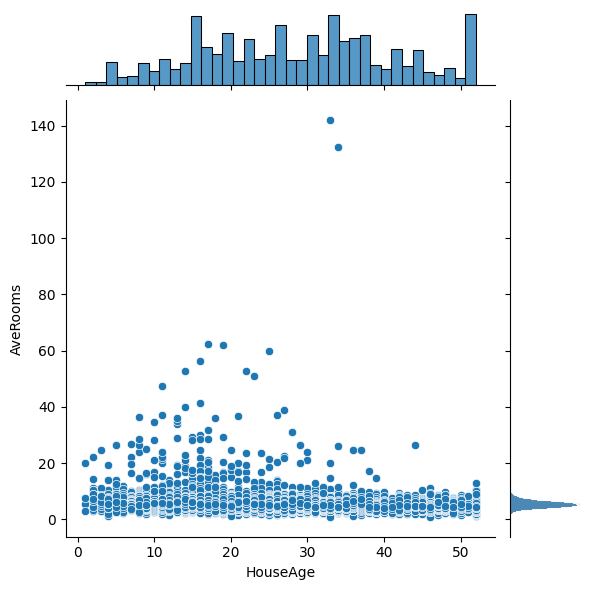

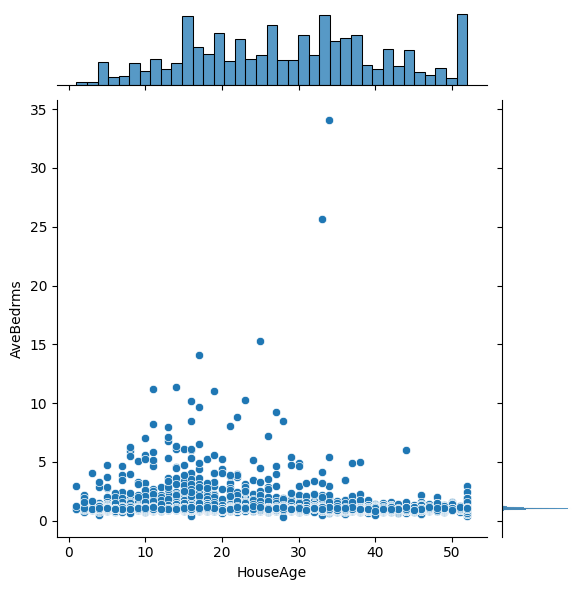

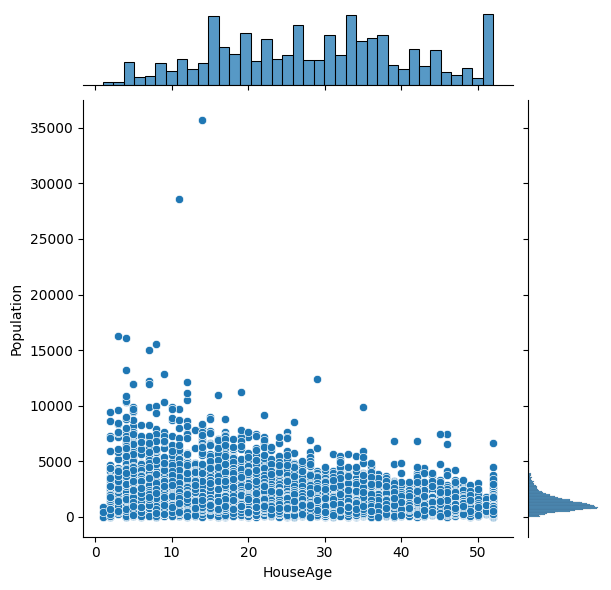

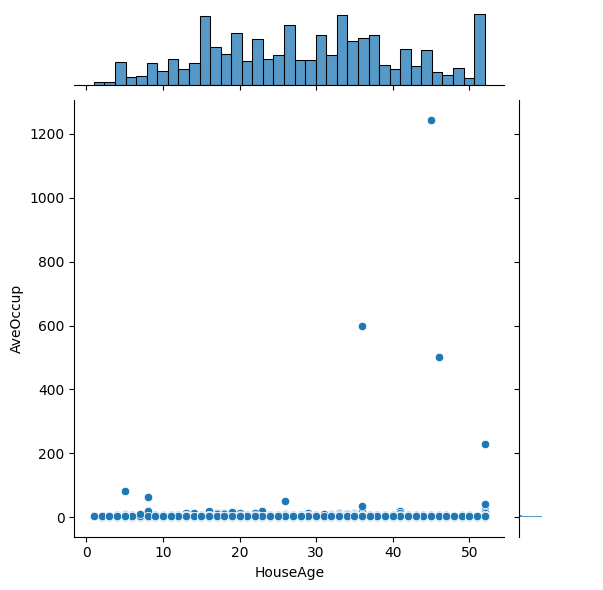

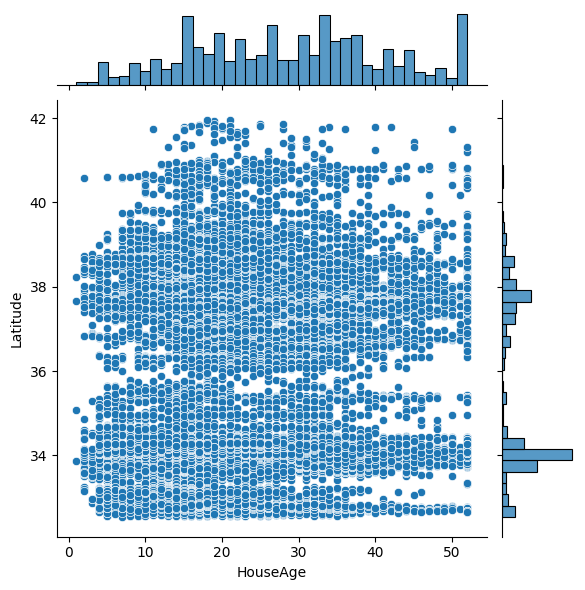

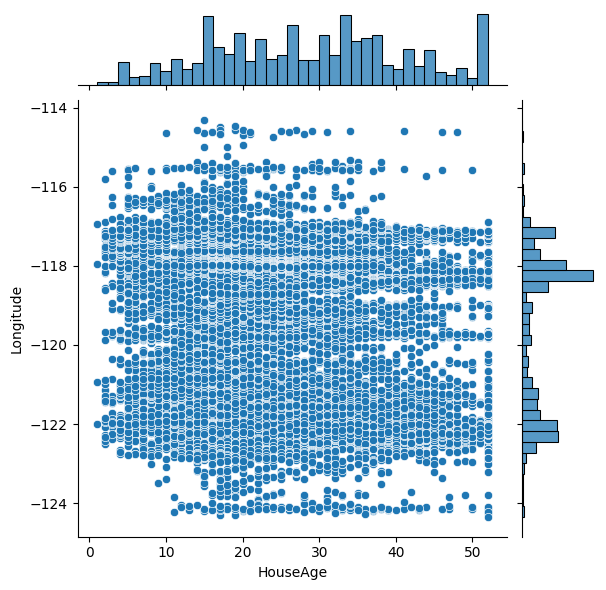

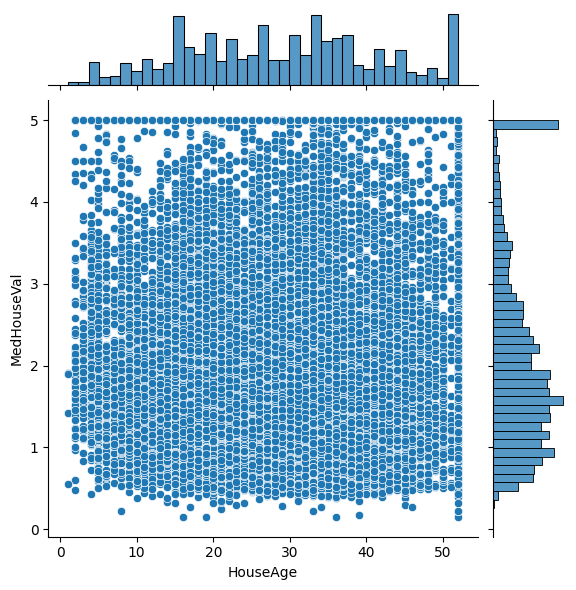

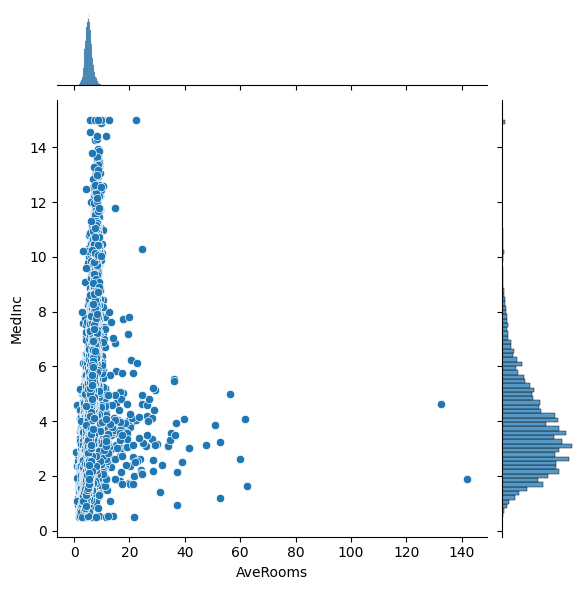

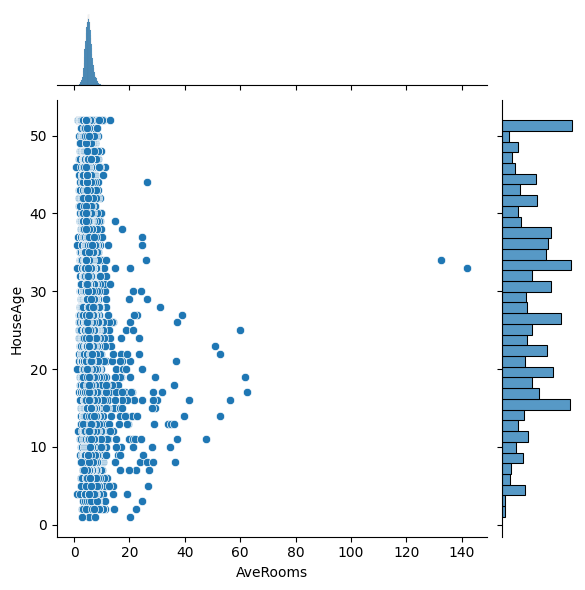

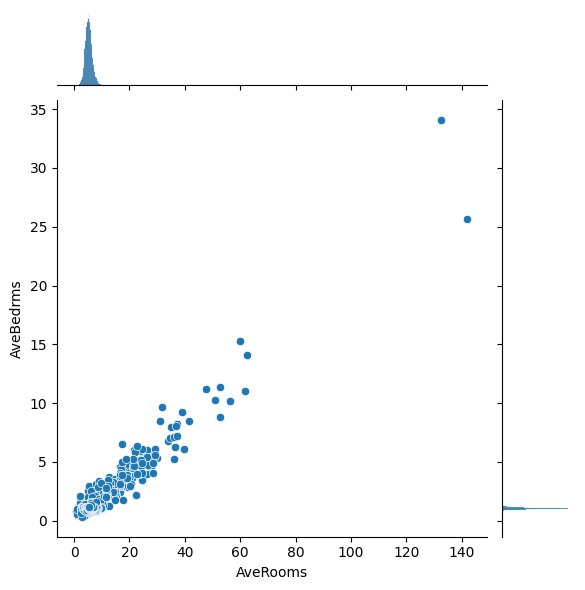

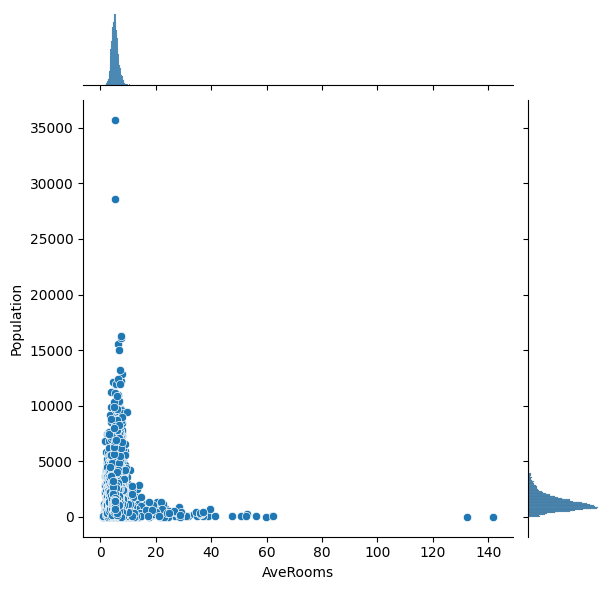

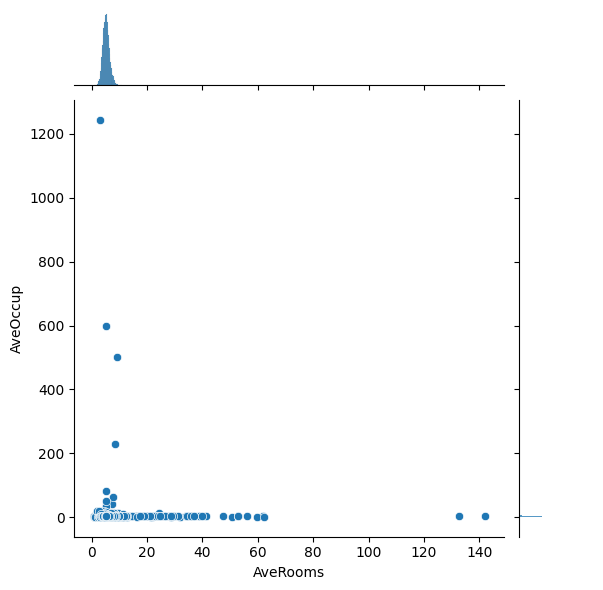

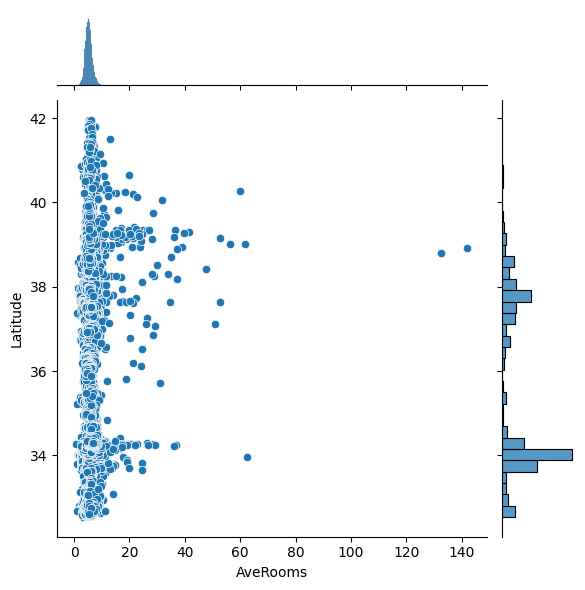

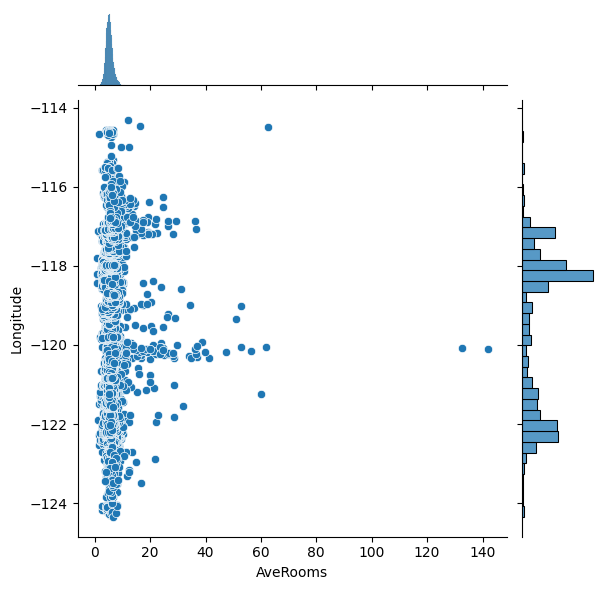

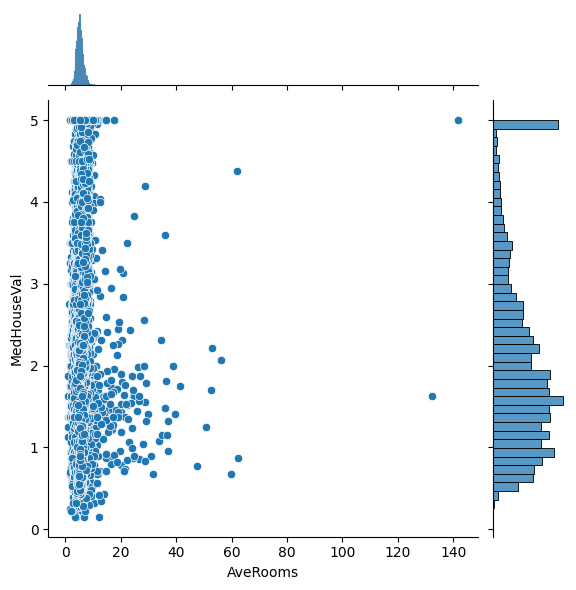

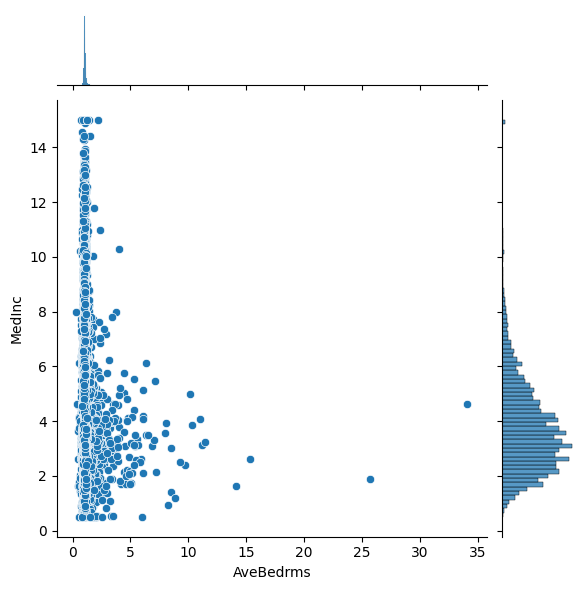

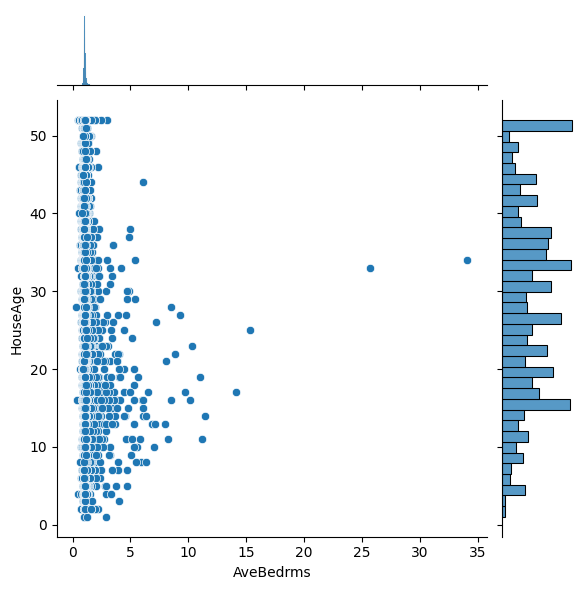

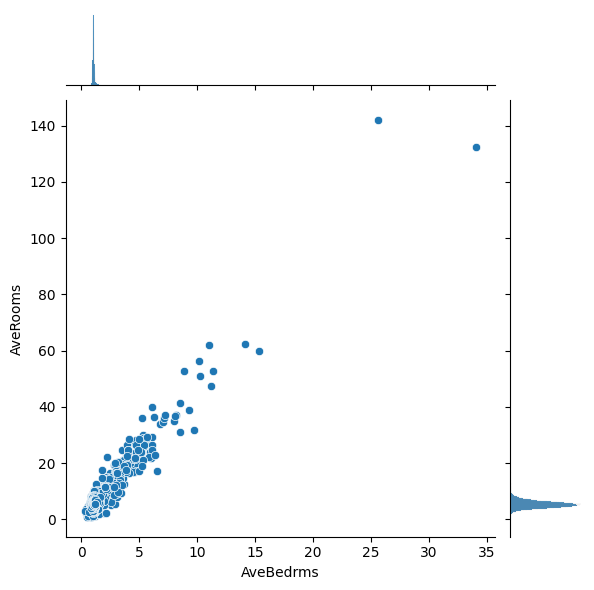

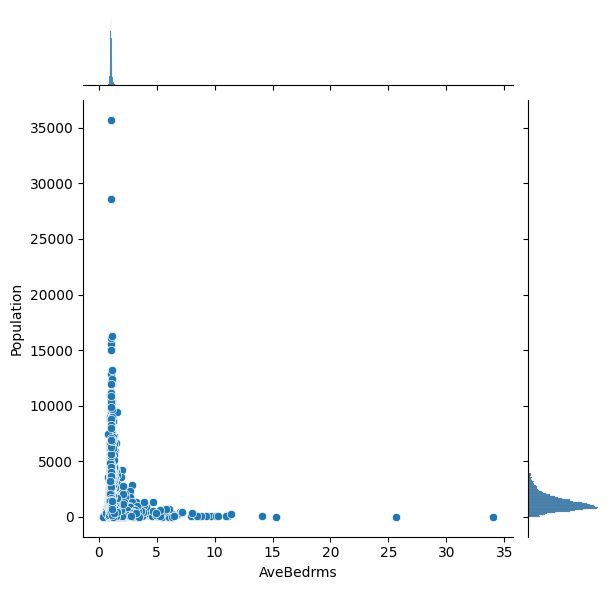

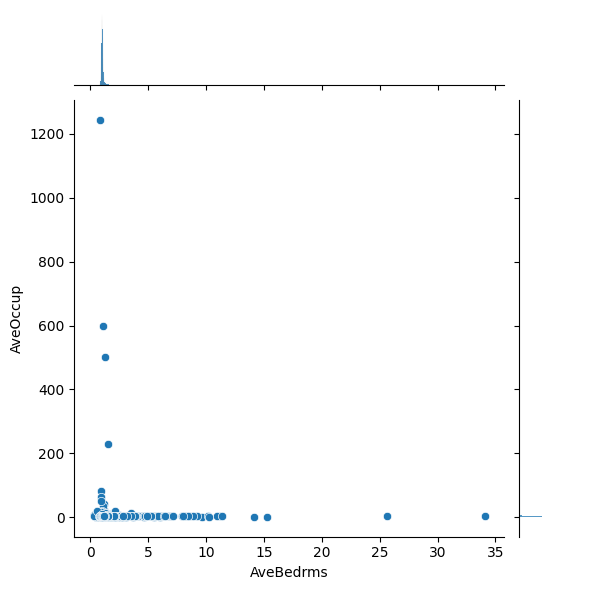

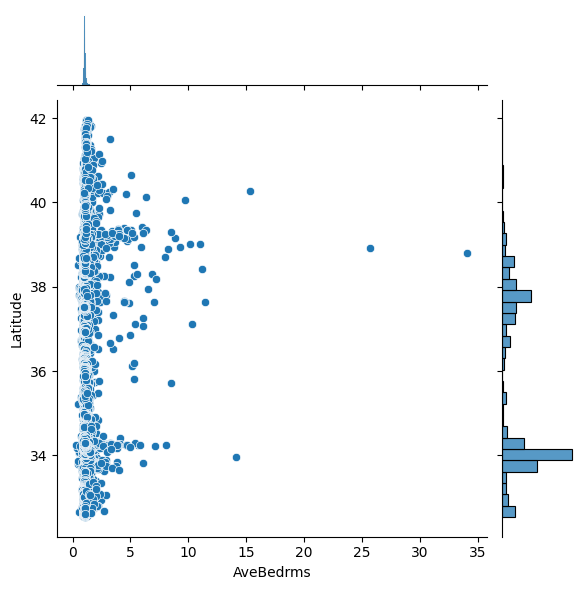

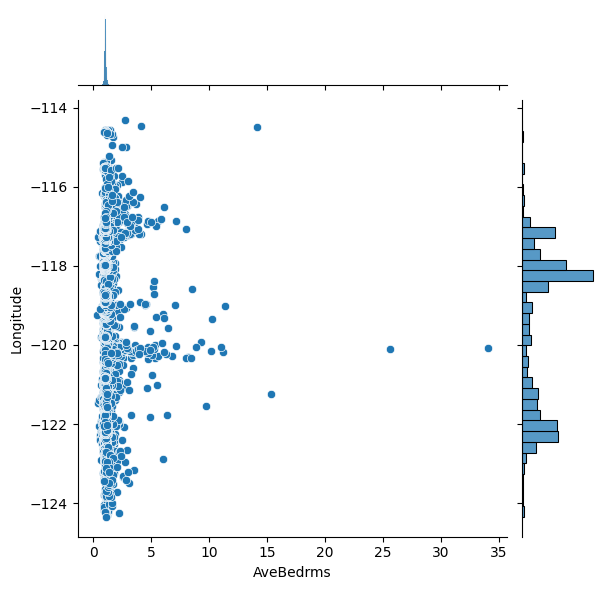

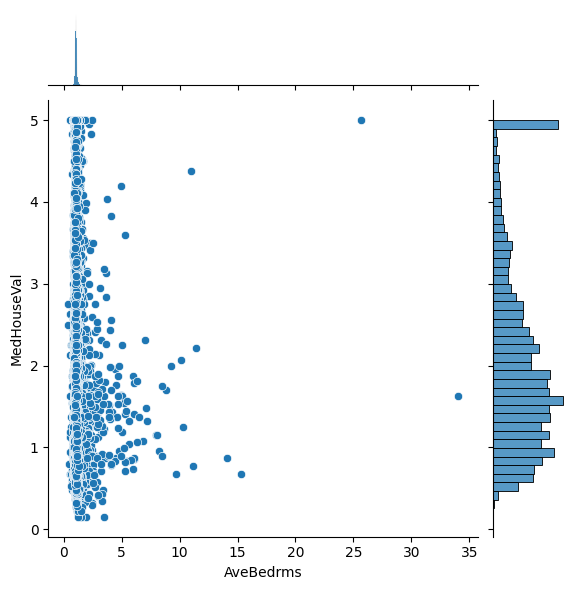

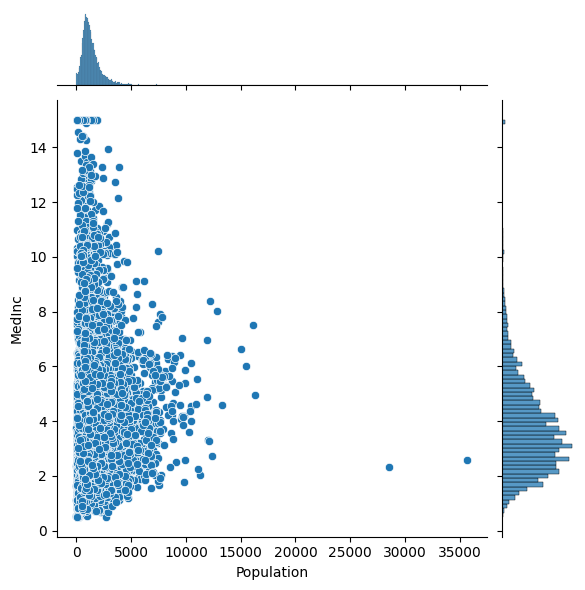

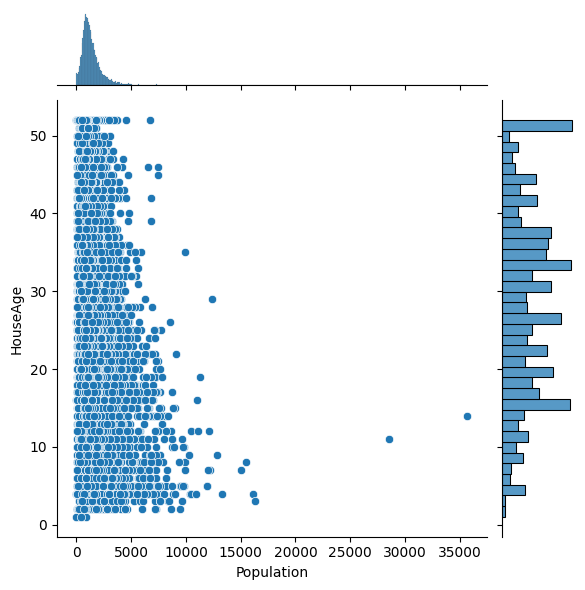

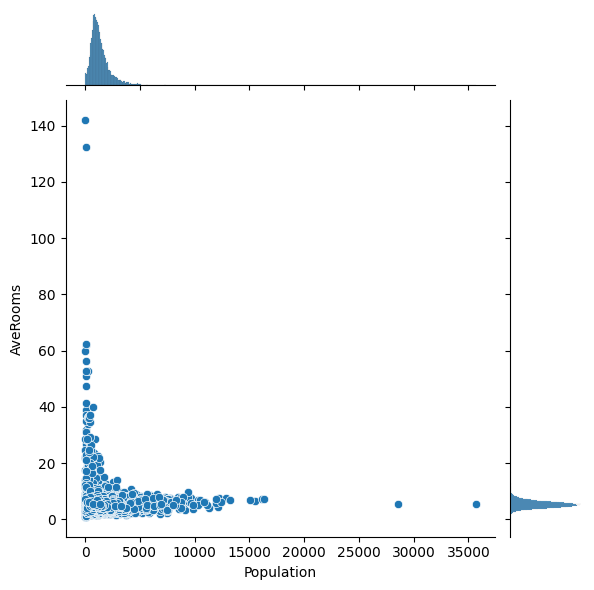

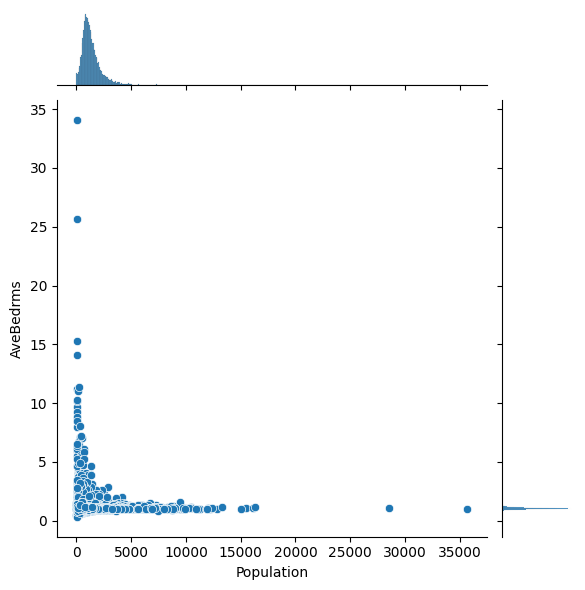

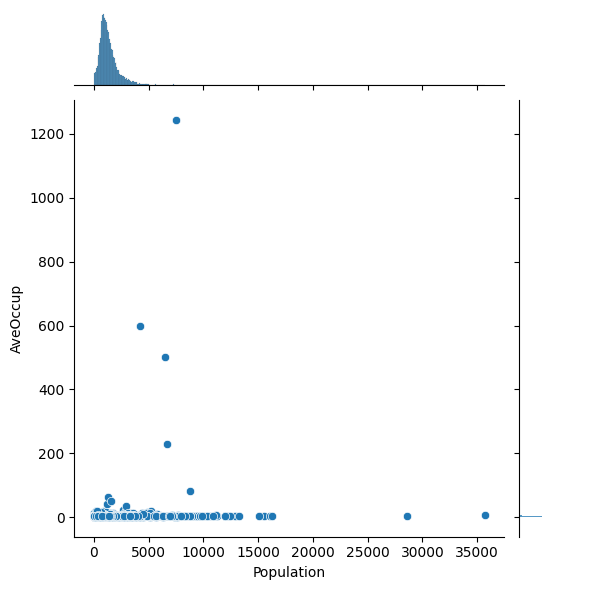

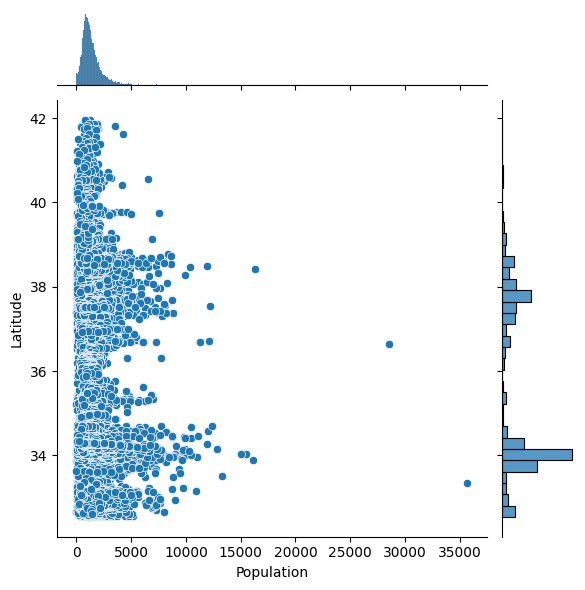

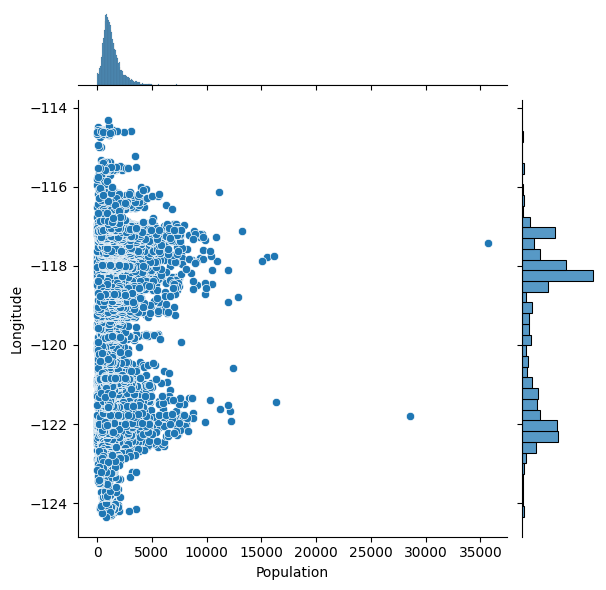

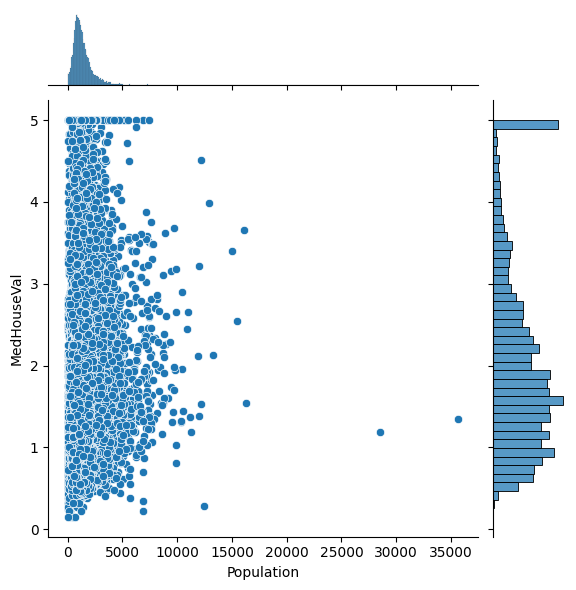

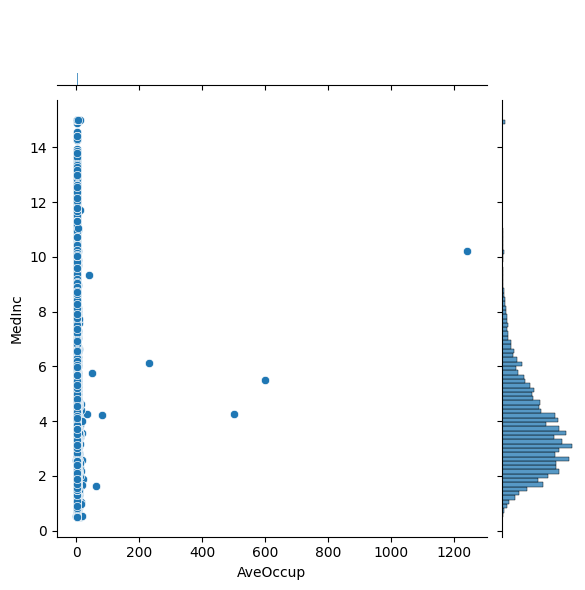

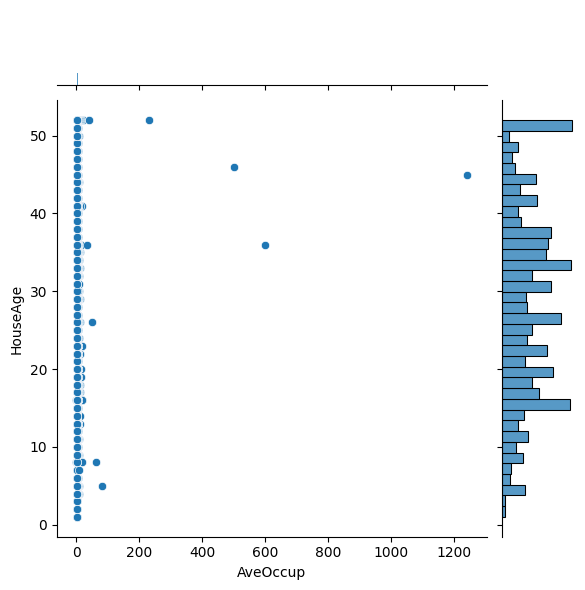

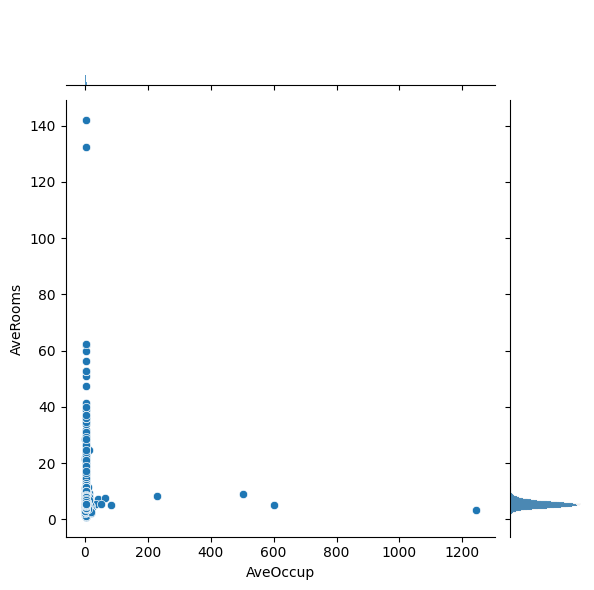

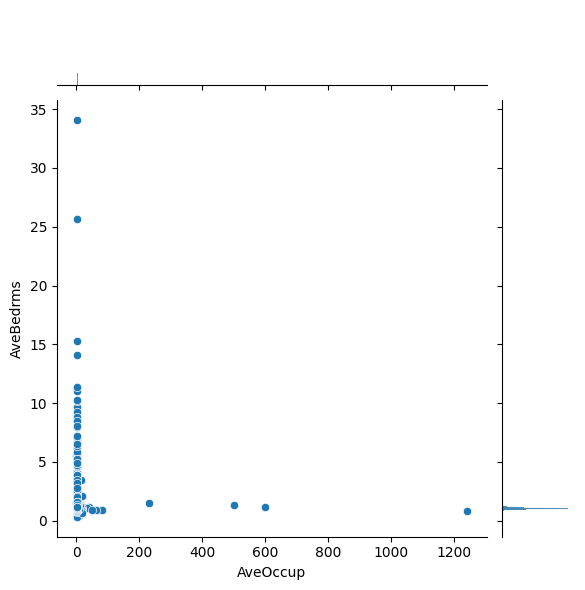

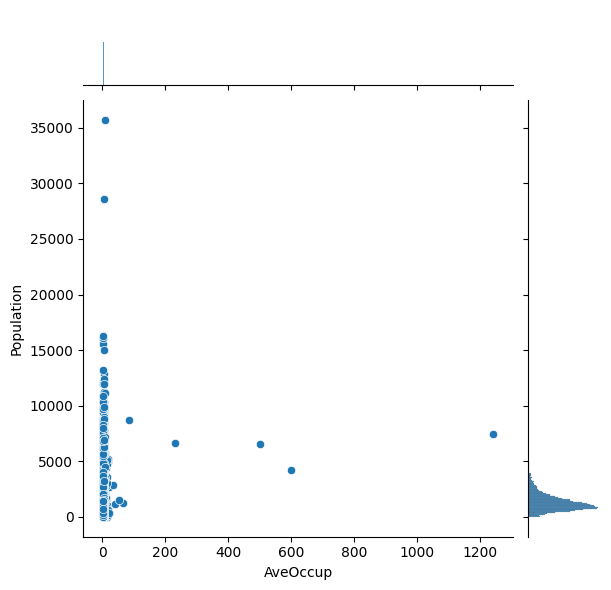

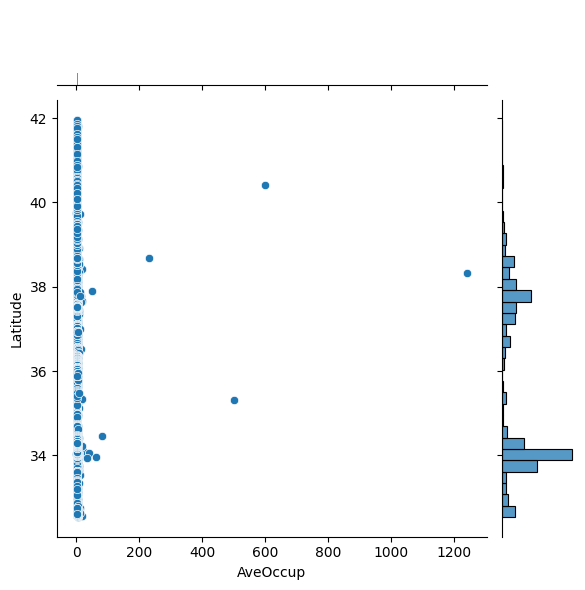

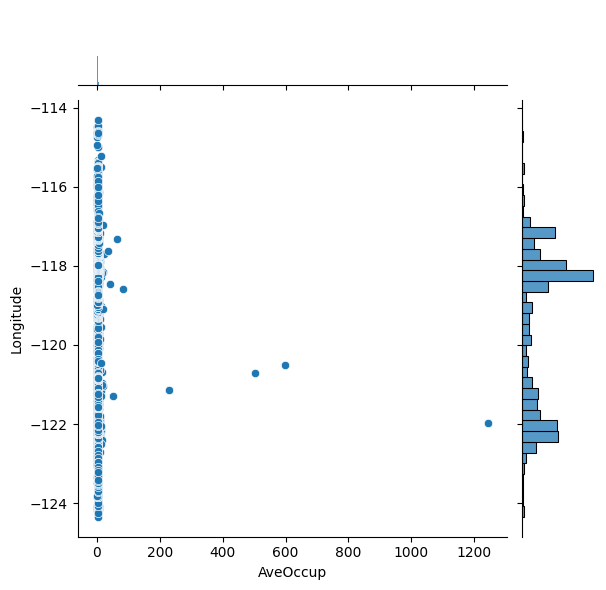

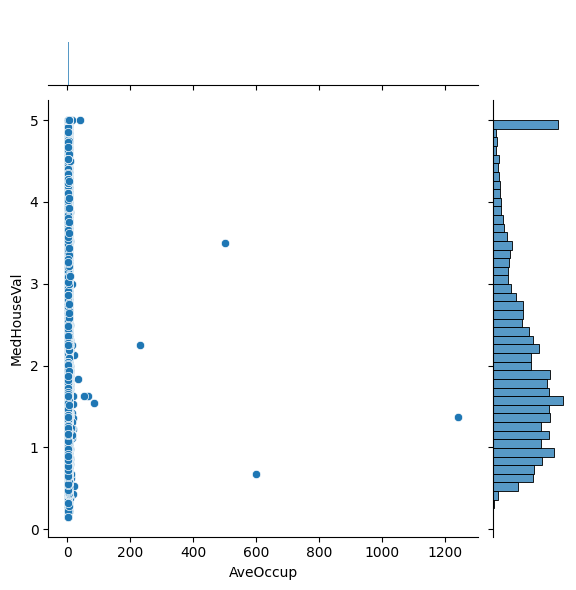

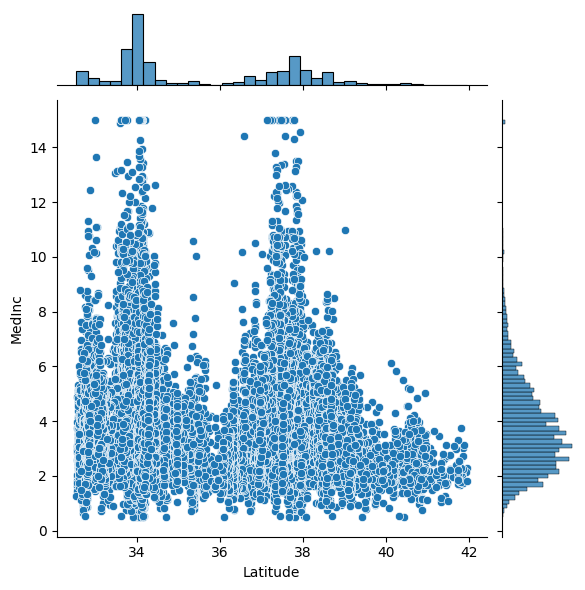

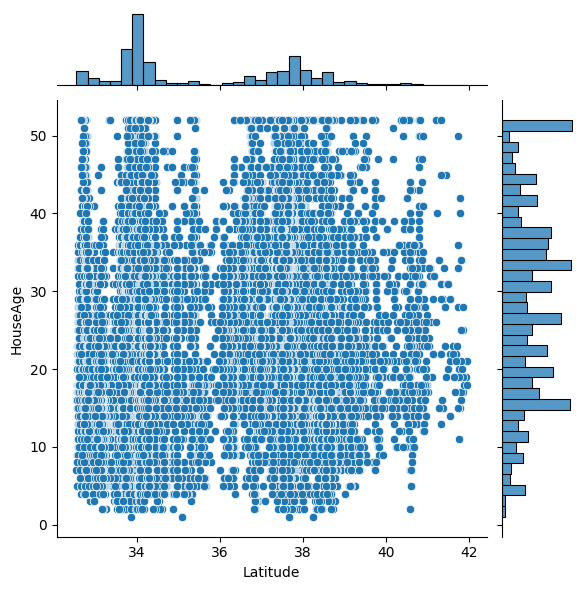

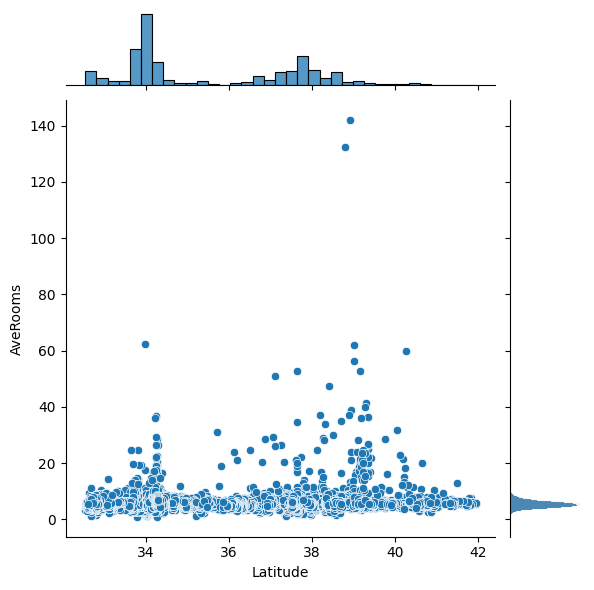

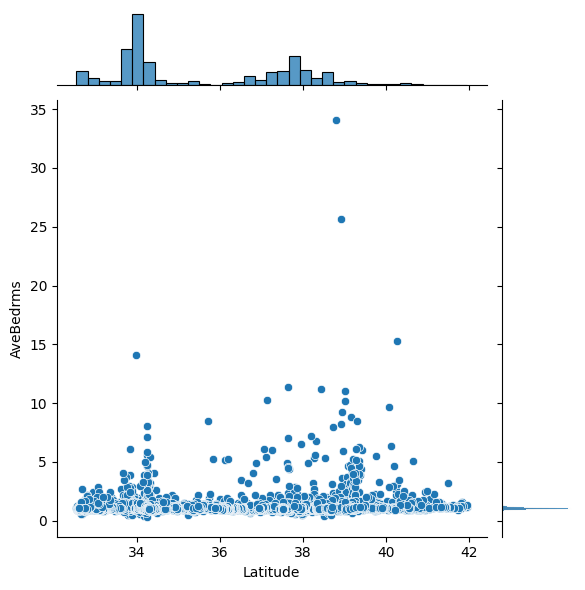

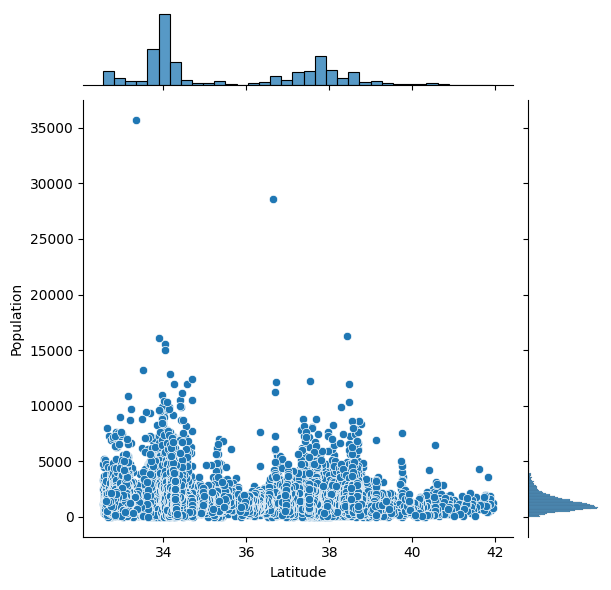

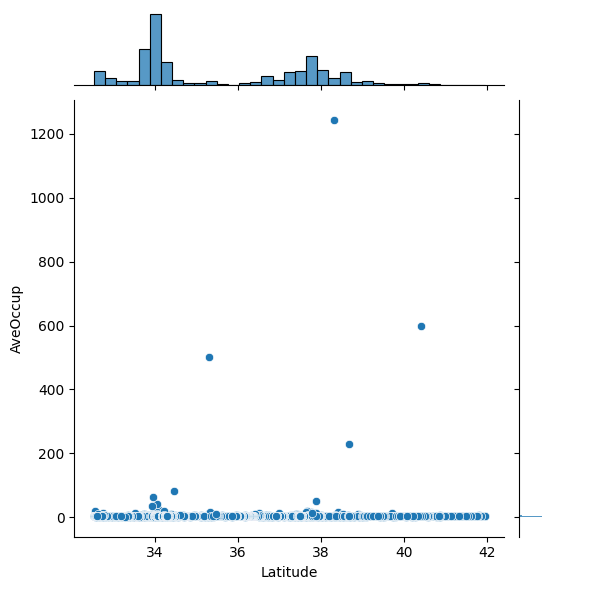

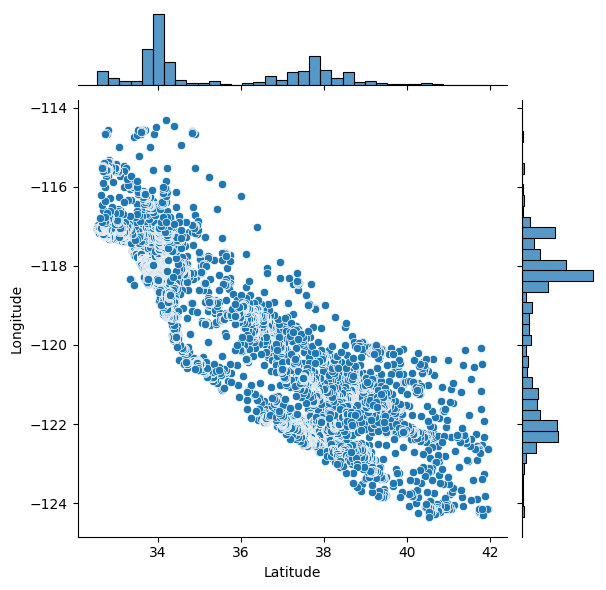

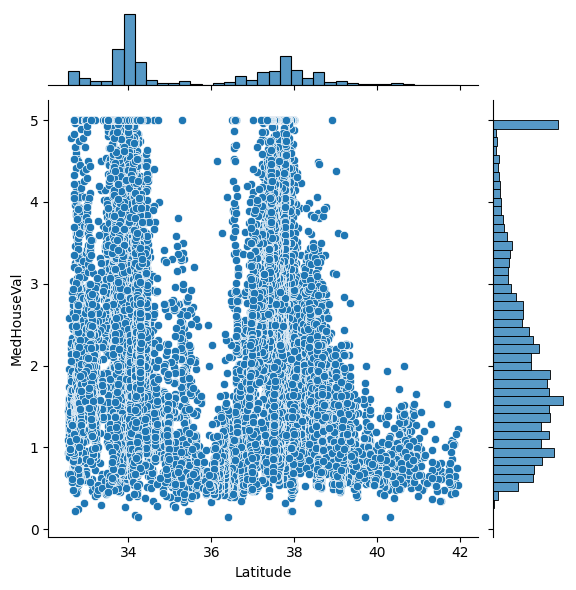

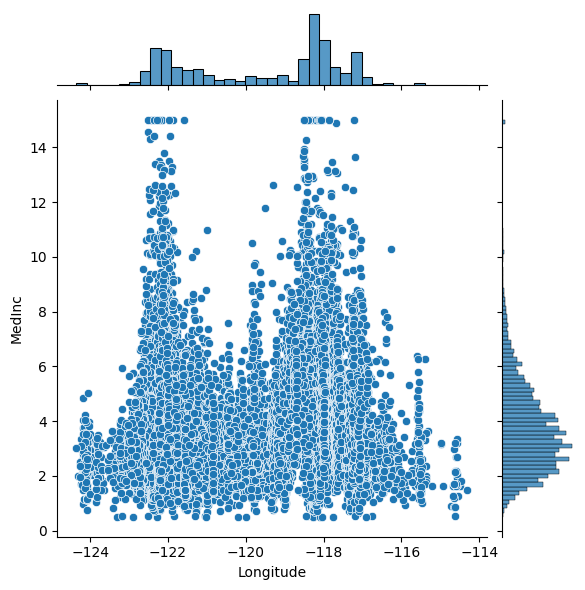

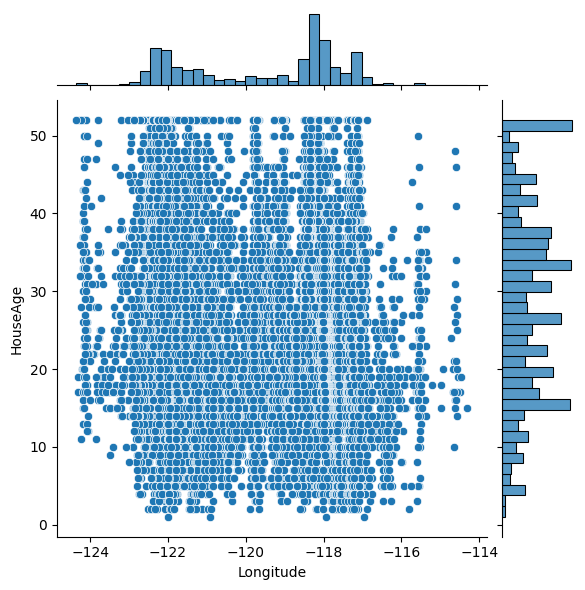

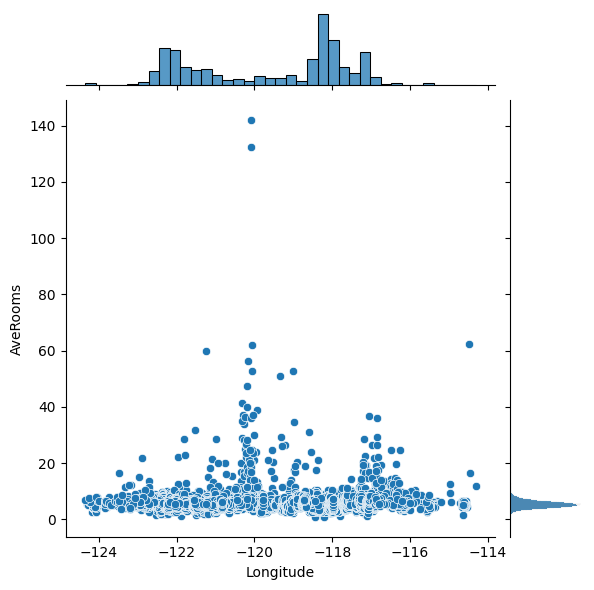

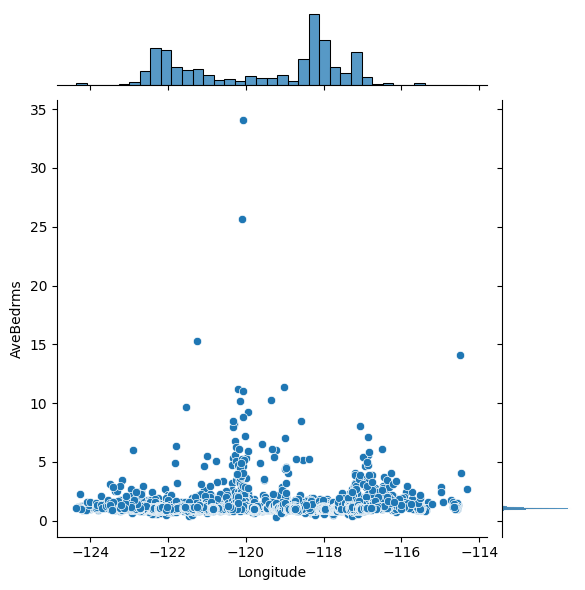

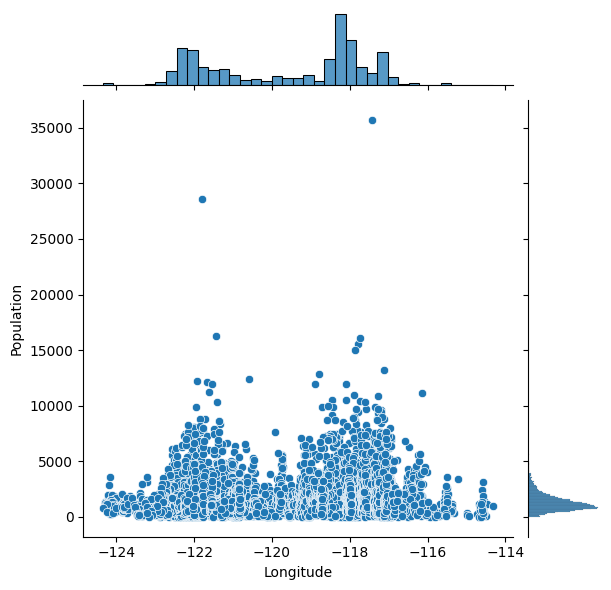

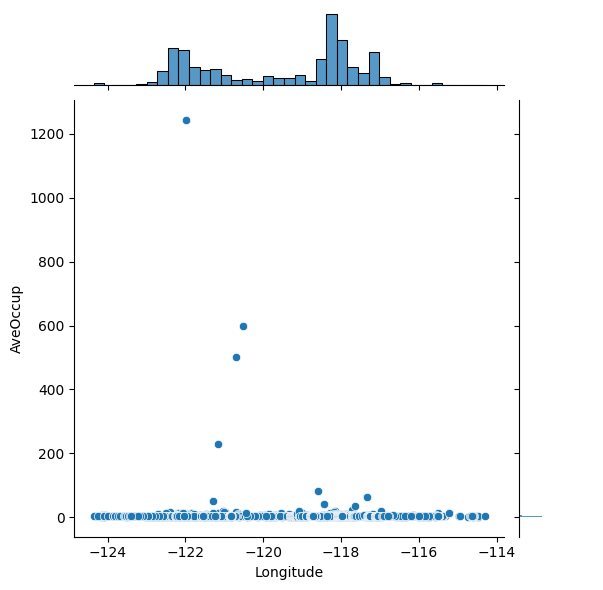

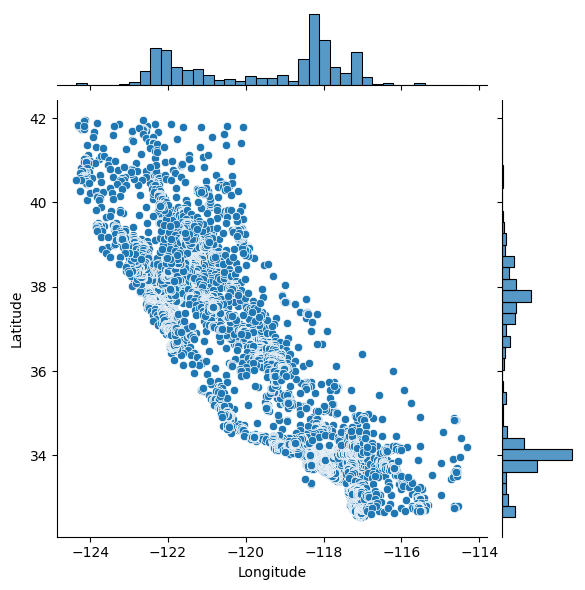

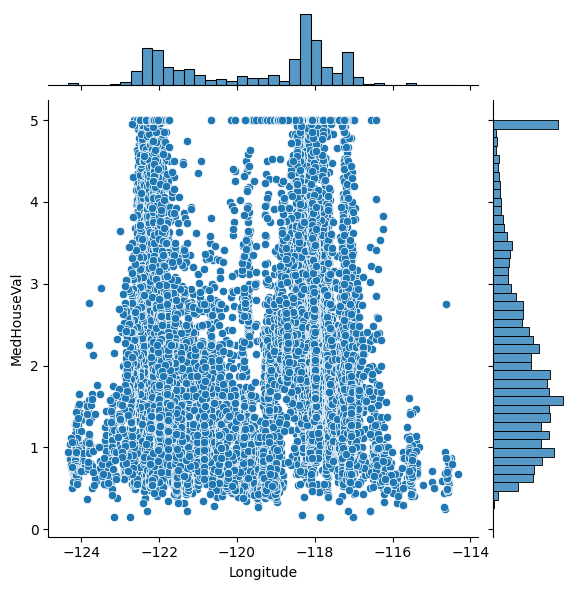

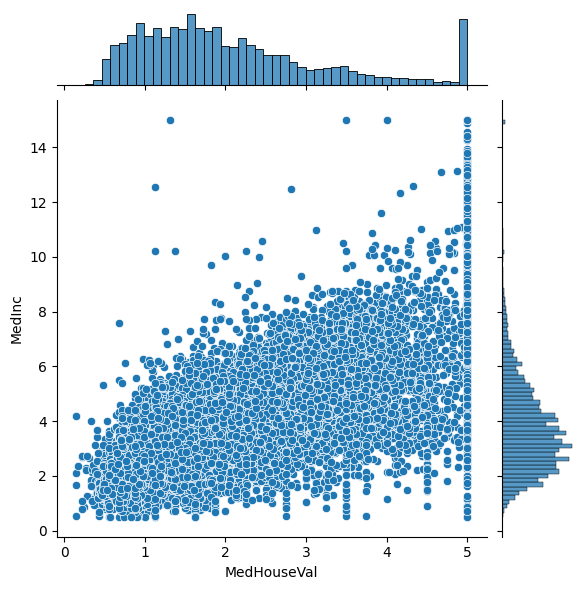

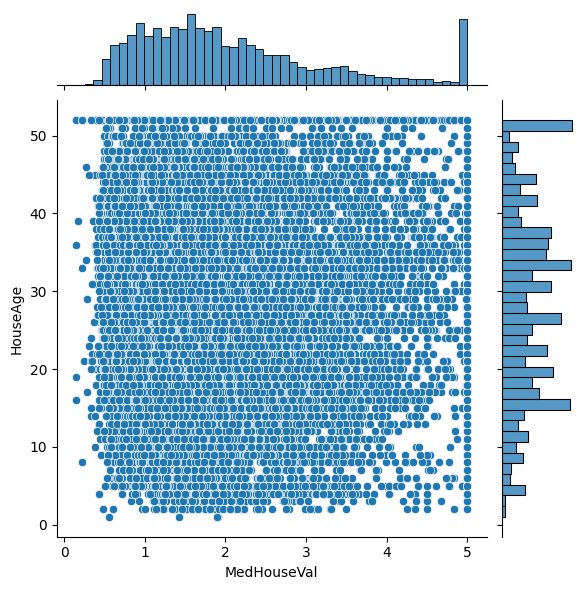

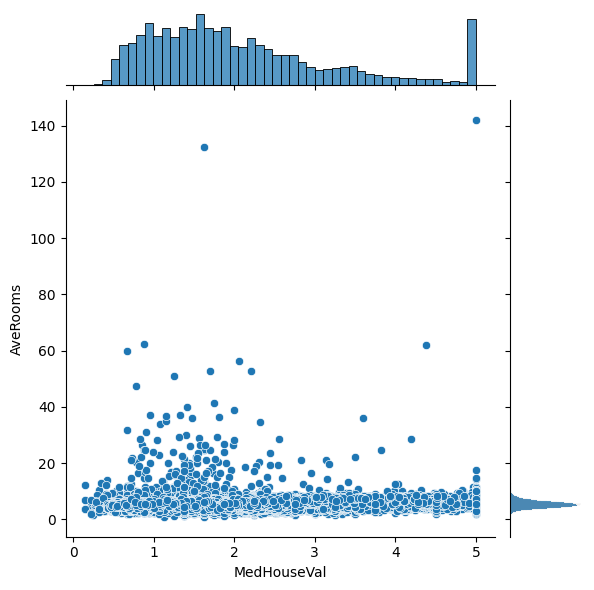

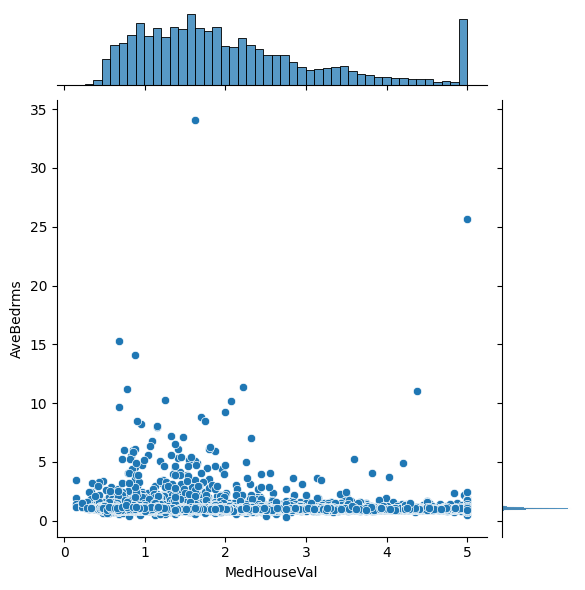

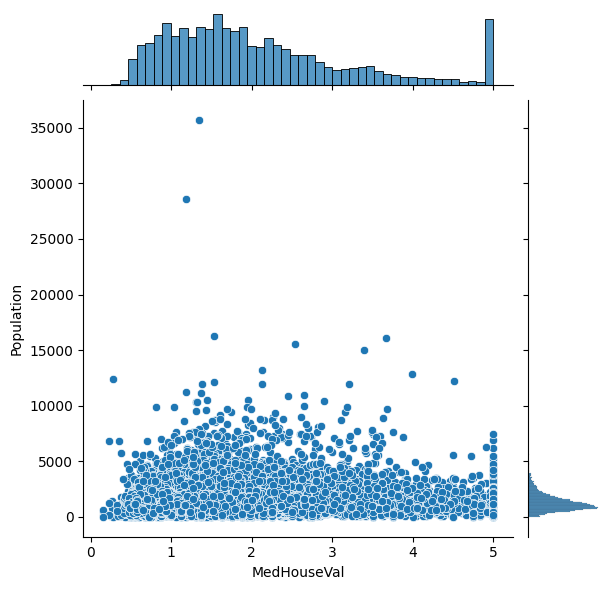

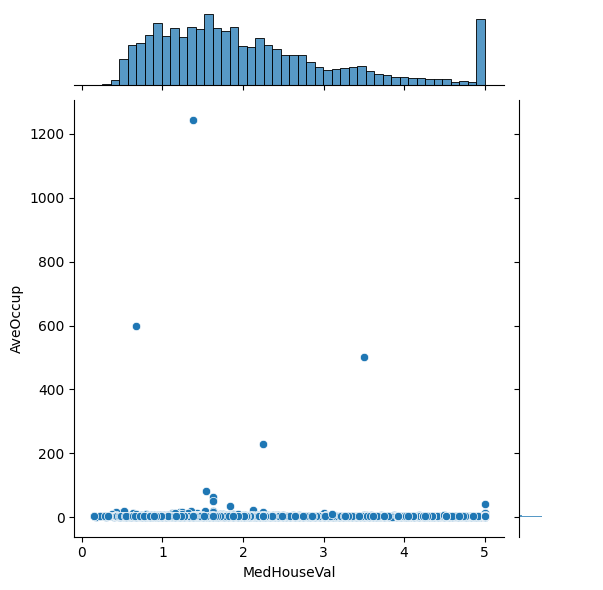

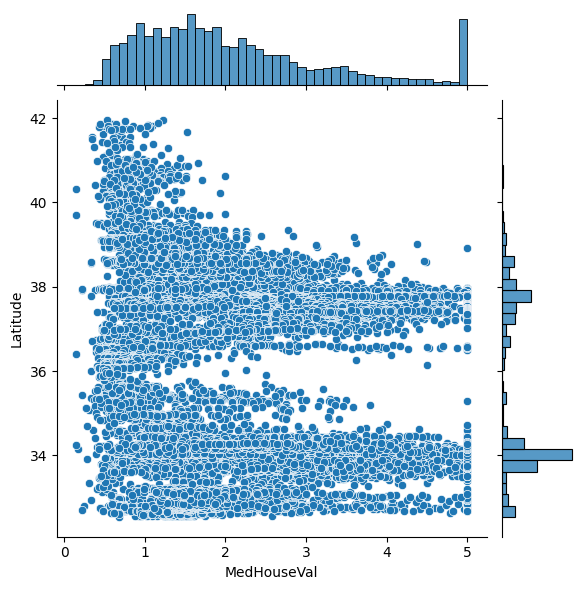

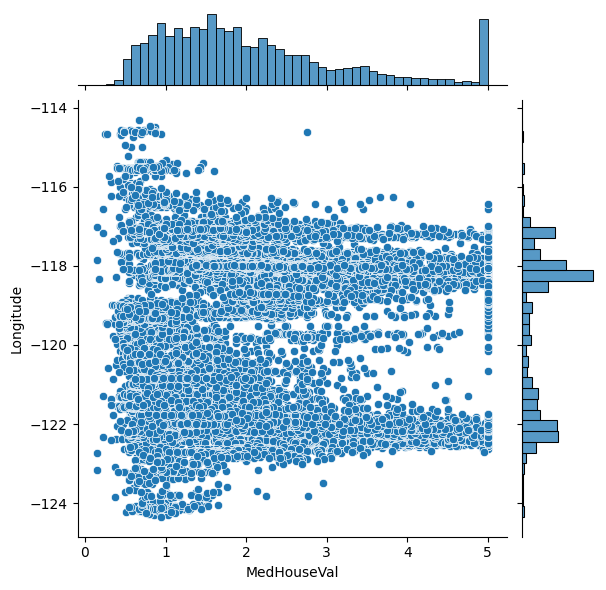

In [28]:
for col1 in california_housing.frame.columns.to_list():
    for col2 in california_housing.frame.columns.to_list():
        if col1 != col2:
            sb.jointplot(data=california_housing.frame, x=col1, y= col2)

## Seaborn Pairplot

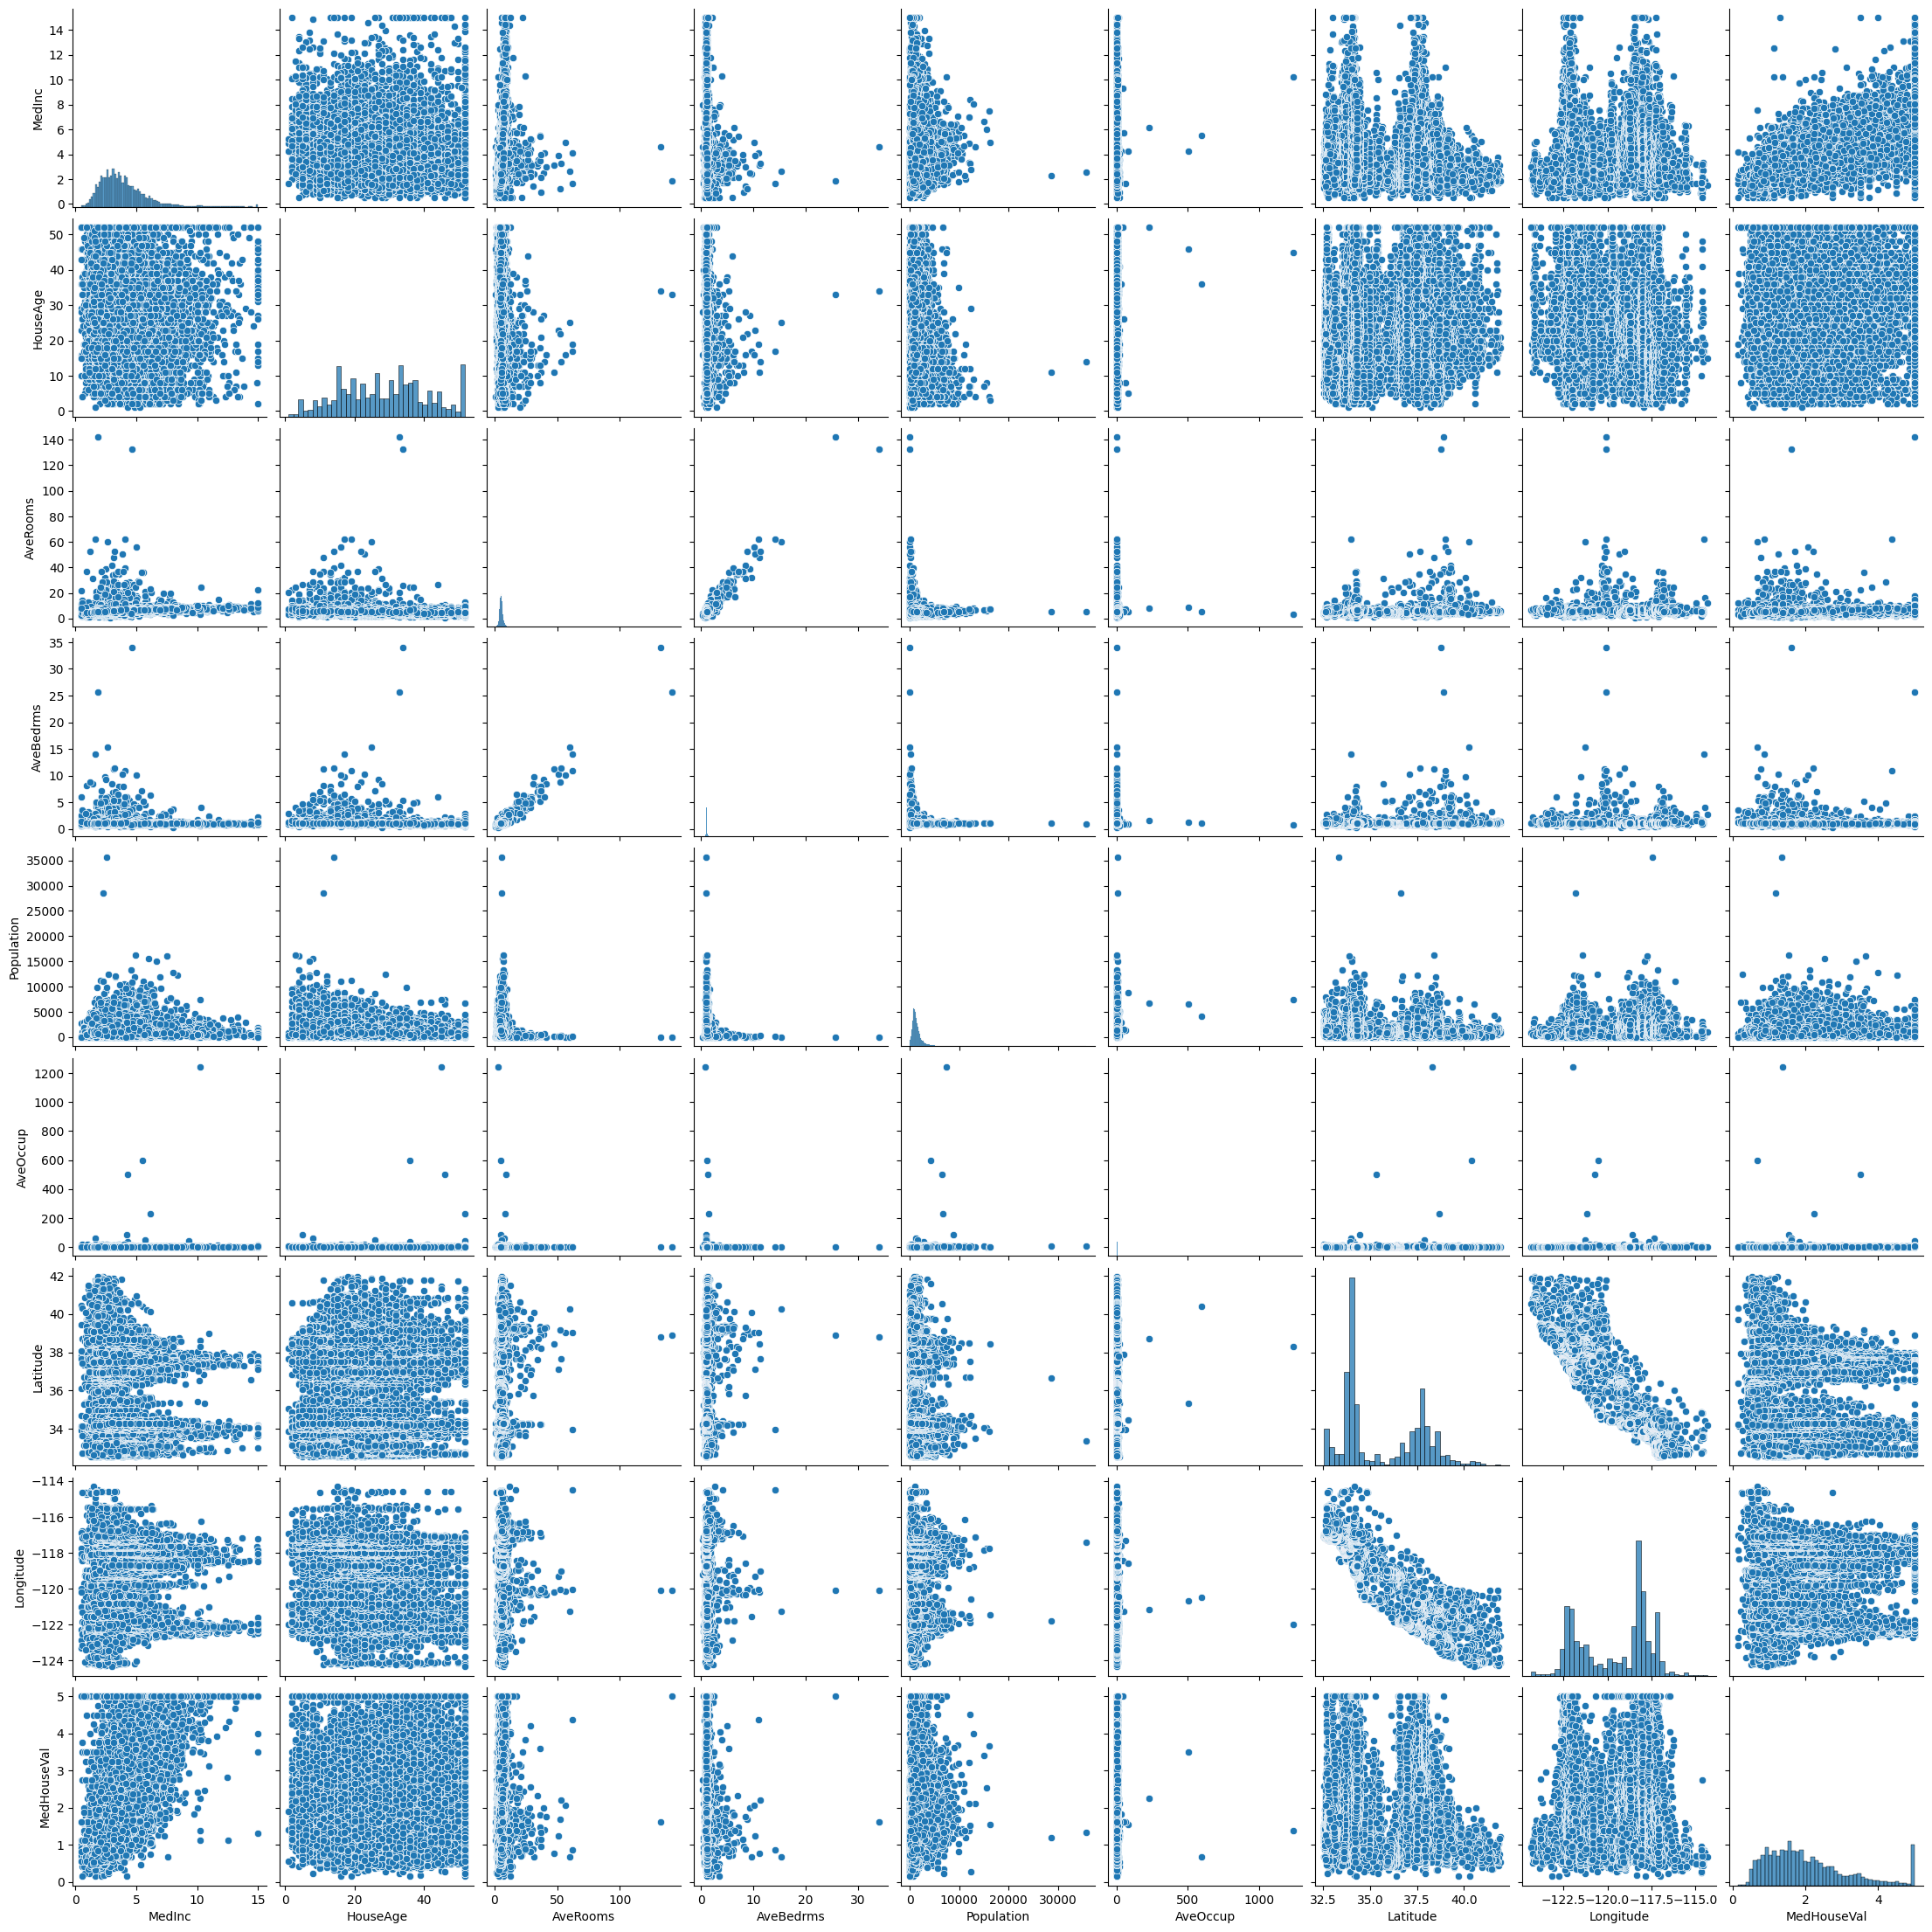

In [29]:
sb.pairplot(california_housing.frame)

## Heatmap

<Axes: >

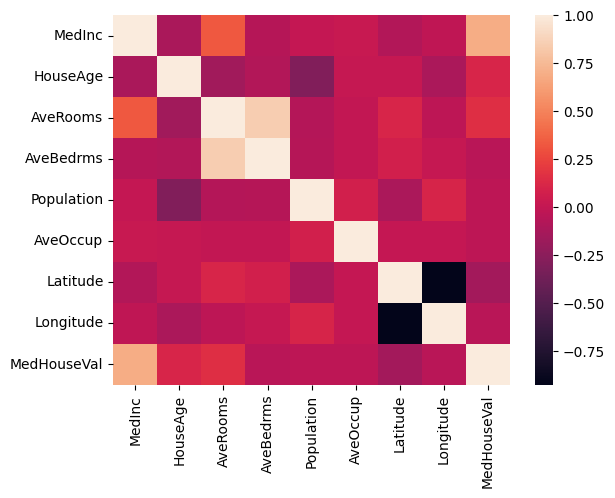

In [30]:
sb.heatmap(california_housing.frame.corr())

# Data processing

## Min-Max Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = california_housing.frame.drop(columns=["MedHouseVal"])
y = california_housing.frame['MedHouseVal']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Regression Models

## •	LinearRegression 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f"Coefficients W = {regressor.coef_}")
print(f"Intercept W_0 = {regressor.intercept_}")

Mean Squared Error: 0.5392617649389445
R2 Score: 0.5951713911192598
Coefficients W = [  6.38062426   0.48576502 -16.90806484  26.87118903  -0.0933284
  -5.099876    -4.01650972  -4.43215237]
Intercept W_0 = 3.7083851634104446


## •	RidgeCV

In [37]:
from sklearn.linear_model import RidgeCV

regressor = RidgeCV()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f"Coefficients W = {regressor.coef_}")
print(f"Intercept W_0 = {regressor.intercept_}")

Mean Squared Error: 0.5301960766382783
R2 Score: 0.6019770840534151
Coefficients W = [  6.06471446   0.48786133 -11.26218013  19.65988542  -0.09781699
  -4.59094925  -4.12990724  -4.53429615]
Intercept W_0 = 3.8456033880561


## •	LassoCV

In [38]:
from sklearn.linear_model import LassoCV

regressor = LassoCV()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f"Coefficients W = {regressor.coef_}")
print(f"Intercept W_0 = {regressor.intercept_}")

Mean Squared Error: 0.5280375006472113
R2 Score: 0.6035975462712879
Coefficients W = [ 5.88473566  0.49295405 -8.06190793 15.82615523 -0.         -2.98073525
 -4.17123077 -4.5667327 ]
Intercept W_0 = 3.889566229157124


# Conclusion

We can see that the mean squared error is close to 0.5 with all 3 models. This is not very good.